In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
data_src = r"D:\Data\Michelle Laser Injury 1\2023-10-30 2hpi_fli1 fish_8_Michellevid\Brightfield - Prosilica\*tif"
data_src = r"D:\Data\both 800fps\brightfield\*tif"
ref_src = r"D:\Data\Michelle Laser Injury 1\2023-10-30 2hpi_fli1 fish_8_Michellevid\ref-frames-2023-10-30-17.08.39\*tif"
ref_period = 36.782587

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases
Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


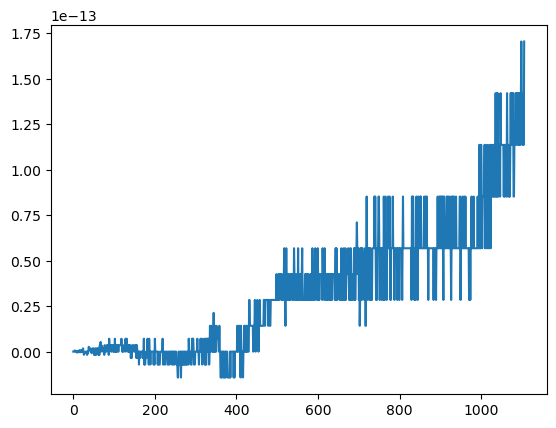

In [3]:
oog_pi = OG.BasicOpticalGating().default()
oog_pi.settings["pi_space"] = True
oog_pi.run()

oog_npi = OG.BasicOpticalGating().default()
oog_npi.settings["pi_space"] = False
oog_npi.run()

plt.plot(oog_pi.unwrapped_phases - 2 * np.pi * oog_npi.unwrapped_phases / oog_npi.sequence_manager.reference_period)
plt.show()

In [4]:
"""oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
#oog.sequence_manager.set_reference_sequence(ref_src)
#oog.sequence_manager.reference_period = ref_period
oog.run()

oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
#oog.sequence_manager.set_reference_sequence(ref_src)
#oog.sequence_manager.reference_period = ref_period"""

oog = OG.BasicOpticalGating().default()
oog.settings["pi_space"] = False
oog.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif
Getting SADs
Getting phases


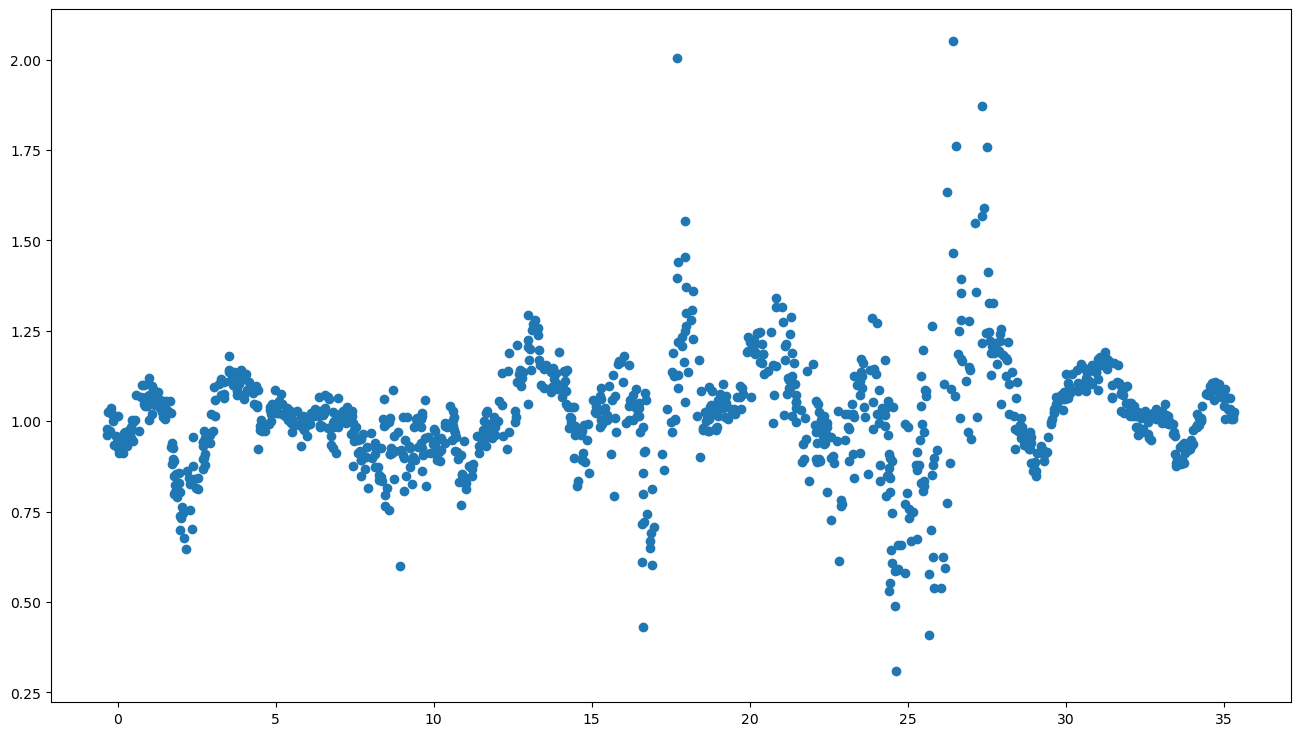

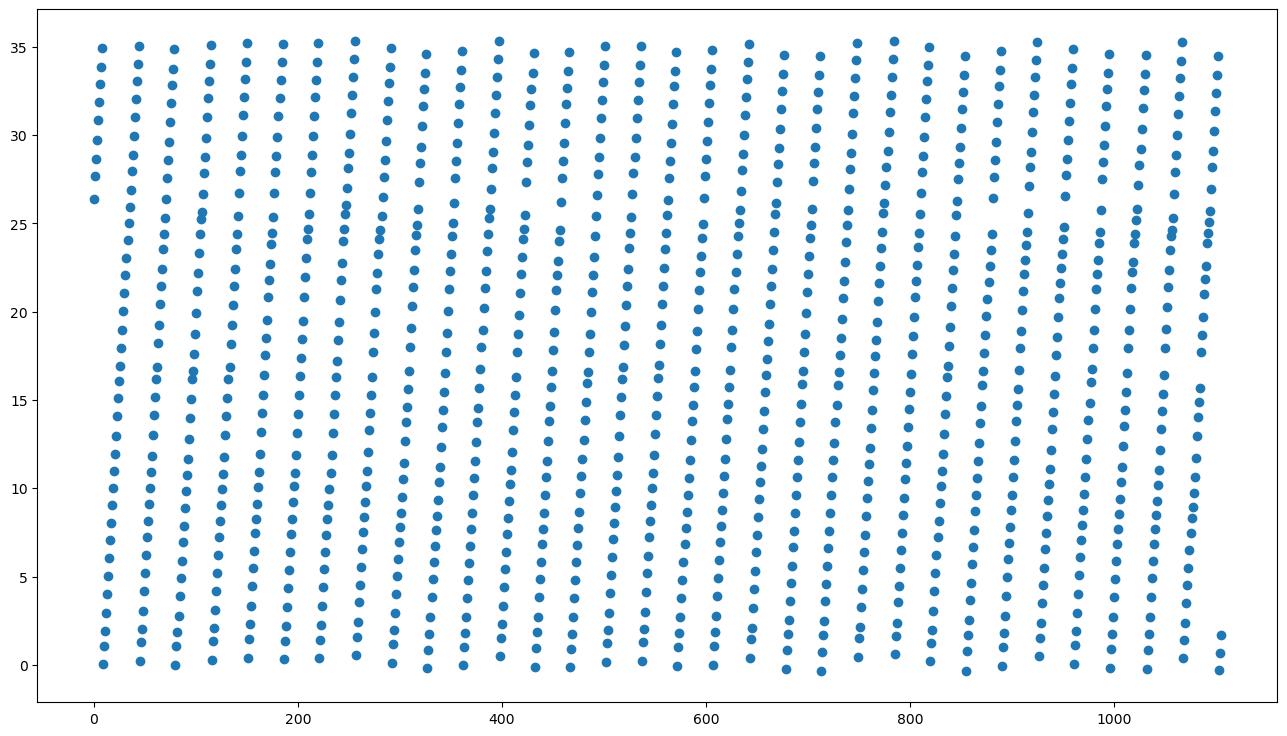

In [5]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.show()
plt.figure(figsize = (16,9))
plt.scatter(range(len(oog.phases)), oog.phases)

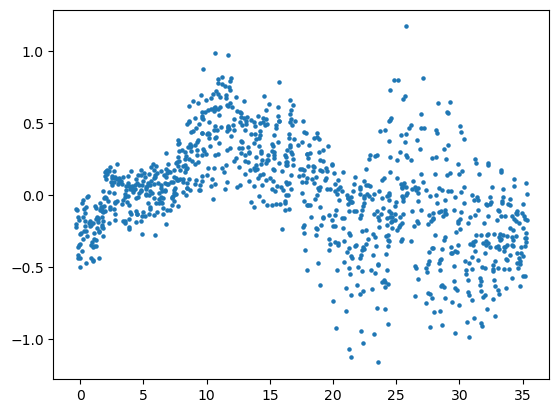

In [6]:
def make_forward_prediction(prediction_start, prediction_points, predict_ahead):
    # Makes a forward prediction
    # prediction_start is the index of the first point to predict from
    # prediction_points is the number of points to use for the prediction
    # predict_ahead is the number of points ahead to predict
    fit = np.polyfit(range(prediction_start, prediction_start + prediction_points), oog.unwrapped_phases[prediction_start:prediction_start + prediction_points], 1)
    fit_fn = np.poly1d(fit)
    return fit_fn(prediction_start + prediction_points + predict_ahead)

prediction_points = len(oog.sequence_manager.reference_sequence)
predict_ahead = 3
predictions = []
for prediction_start in range(0, len(oog.unwrapped_phases) - prediction_points - predict_ahead):
    predictions.append(make_forward_prediction(prediction_start, prediction_points, predict_ahead) - oog.unwrapped_phases[prediction_start + prediction_points + predict_ahead])
plt.scatter(oog.phases[prediction_points+predict_ahead::], np.array(predictions), s = 5)
plt.show()